In [164]:
import numpy as np
import pandas as pd


In [165]:
df = pd.read_csv('data.csv')

In [166]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [168]:
df.duplicated().sum()

np.int64(0)

In [169]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [170]:
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [171]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [172]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [173]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [174]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [175]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [177]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [179]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim = X.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\repos\Customer-Churn-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [182]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6872 - loss: 0.6008 - val_accuracy: 0.8012 - val_loss: 0.4678
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8062 - loss: 0.4524 - val_accuracy: 0.8106 - val_loss: 0.4352
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8245 - loss: 0.4279 - val_accuracy: 0.8163 - val_loss: 0.4229
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8292 - loss: 0.4107 - val_accuracy: 0.8263 - val_loss: 0.4113
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8355 - loss: 0.3922 - val_accuracy: 0.8338 - val_loss: 0.4039
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8363 - loss: 0.3899 - val_accuracy: 0.8319 - val_loss: 0.3952
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8543 - loss: 0.3699 - val_accuracy: 0.8394 - val_loss: 0.3883
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8574 - loss: 0.3

In [183]:
model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


array([[0.32405505],
       [0.21723525],
       [0.17232145],
       ...,
       [0.16918954],
       [0.22532736],
       [0.12050389]], dtype=float32)

In [184]:
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8525

In [186]:
import matplotlib.pyplot as plt


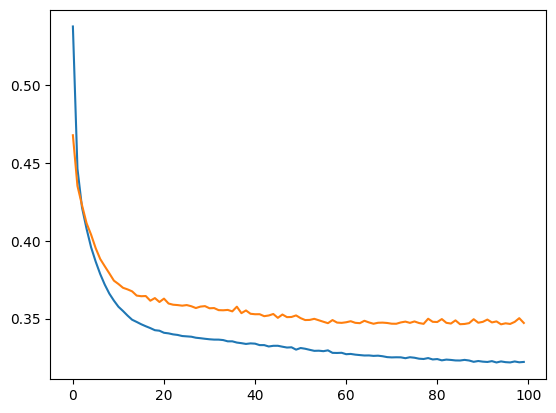

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   


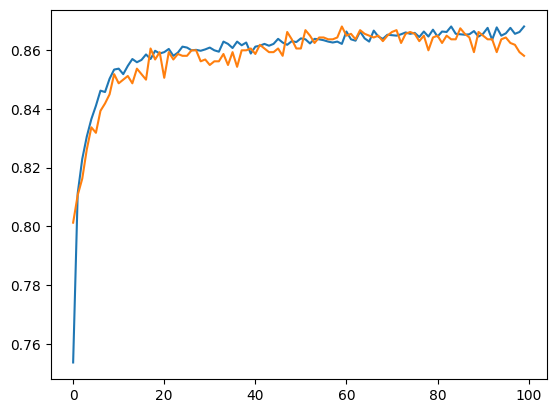

In [188]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])